<a href="https://colab.research.google.com/github/T-Cent/culling/blob/main/Culling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget https://mandrillapp.com/track/click/31045195/dxomark.com?p=eyJzIjoiUDU4TUUyMFdzM2ZETzhXWUwzVXJNUXlMalpVIiwidiI6MSwicCI6IntcInVcIjozMTA0NTE5NSxcInZcIjoxLFwidXJsXCI6XCJodHRwczpcXFwvXFxcL2R4b21hcmsuY29tXFxcL2Rha2RhdGFcXFwvZGF0YXNldFxcXC9sTjRsU1R2eS0tLXFBVHB1cG1nSi0tLXhKZWpMSURCV04tLS1ENUczZ01SZ2I3Z2Y0PVwiLFwiaWRcIjpcIjIzZmYwMTExODlmYTRlNmQ4ZDI3NTY0MTIyZWNlODA5XCIsXCJ1cmxfaWRzXCI6W1wiZWRiMTdkMWY2ZjgxMTQxM2UxNDRlNGMwMmVmM2NhMzQyZDQ5OWVlOVwiXX0ifQ

In [2]:
#!unzip /content/dxomark.com?p=eyJzIjoiUDU4TUUyMFdzM2ZETzhXWUwzVXJNUXlMalpVIiwidiI6MSwicCI6IntcInVcIjozMTA0NTE5NSxcInZcIjoxLFwidXJsXCI6XCJodHRwczpcXFwvXFxcL2R4b21hcmsuY29tXFxcL2Rha2RhdGFcXFwvZGF0YXNldFxcXC9sTjRsU1R2eS0tLXFBVHB1cG1nSi0tLXhKZWpMSURCV04tLS -d /content/drive/MyDrive/Culling

In [3]:
import os

In [4]:
details_filenames = ["/content/drive/MyDrive/Culling/Dataset/Details/" + i for i in os.listdir("/content/drive/MyDrive/Culling/Dataset/Details")]
exposure_filenames = ["/content/drive/MyDrive/Culling/Dataset/Exposure/" + i for i in os.listdir("/content/drive/MyDrive/Culling/Dataset/Exposure")]
overall_filenames = ["/content/drive/MyDrive/Culling/Dataset/Overall/" + i for i in os.listdir("/content/drive/MyDrive/Culling/Dataset/Overall")]

In [5]:
len(details_filenames), len(exposure_filenames), len(overall_filenames)

(5117, 5116, 5116)

In [6]:
import PIL
from IPython.display import Image

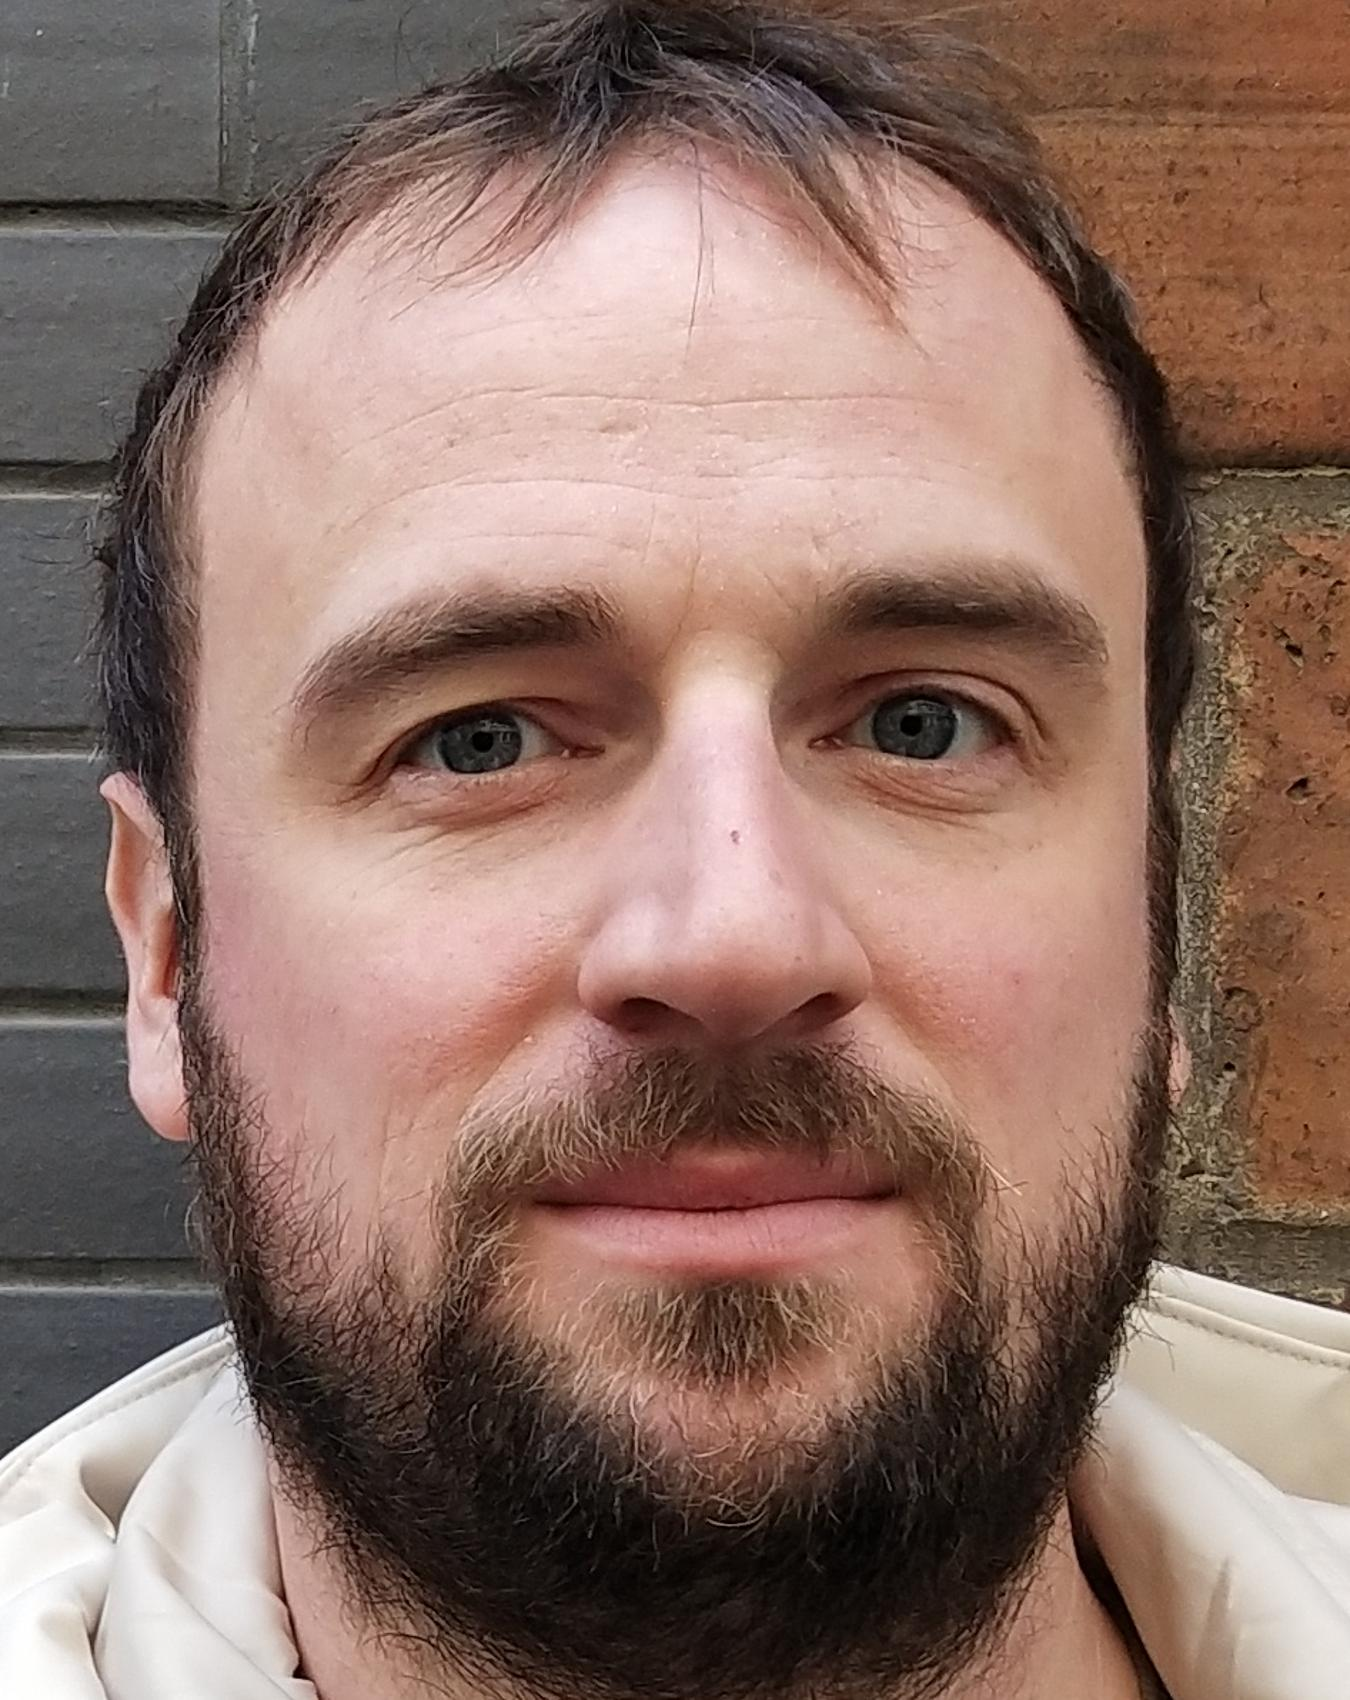

In [7]:
from IPython.display import Image
Image(exposure_filenames[2])

Using the pretrained model - https://huggingface.co/google/vit-base-patch16-224

In [8]:
model_url = 'google/vit-base-patch16-224'

In [9]:
help(PIL.Image.open)

Help on function open in module PIL.Image:

open(fp, mode='r', formats=None)
    Opens and identifies the given image file.
    
    This is a lazy operation; this function identifies the file, but
    the file remains open and the actual image data is not read from
    the file until you try to process the data (or call the
    :py:meth:`~PIL.Image.Image.load` method).  See
    :py:func:`~PIL.Image.new`. See :ref:`file-handling`.
    
    :param fp: A filename (string), pathlib.Path object or a file object.
       The file object must implement ``file.read``,
       ``file.seek``, and ``file.tell`` methods,
       and be opened in binary mode.
    :param mode: The mode.  If given, this argument must be "r".
    :param formats: A list or tuple of formats to attempt to load the file in.
       This can be used to restrict the set of formats checked.
       Pass ``None`` to try all supported formats. You can print the set of
       available formats by running ``python3 -m PIL`` or using

In [10]:
import numpy as np

In [11]:
# !pip uninstall -y pillow
# !pip install pillow-simd

taking only 900 images to start with as our dataset is >15,000 images

In [13]:
#converting filenames to PIL Image objects
details_images = [PIL.Image.open(f) for f in details_filenames[:300] if os.path.splitext(f)[1] in [".JPG", ".jpeg", ".jpg", ".tif", ".tiff"]]
exposure_images = [PIL.Image.open(f) for f in exposure_filenames[:300] if os.path.splitext(f)[1] in [".JPG", ".jpeg", ".jpg", ".tif", ".tiff"]]
overall_images = [PIL.Image.open(f) for f in overall_filenames[:300] if os.path.splitext(f)[1] in [".JPG", ".jpeg", ".jpg", ".tif", ".tiff"]]

In [14]:
details_images[5].size

(1900, 2400)

In [15]:
details_images = list(map(lambda x: x.resize(size=(224, 224)), details_images))
exposure_images = list(map(lambda x: x.resize(size=(224, 224)), exposure_images))
overall_images = list(map(lambda x: x.resize(size=(224, 224)), overall_images))

In [16]:
import random

In [17]:
def select(x):
  return random.sample(x, k=random.randint(int(len(x)*6/13), int(len(x)*7/13)))

details_blurred = select(details_images)
exposure_blurred = select(exposure_images)
overall_blurred = select(overall_images)

details_partially_blurred = select(details_images)
exposure_partially_blurred = select(exposure_images)
overall_partially_blurred = select(overall_images)

details_exposed = select(details_images)
exposure_exposed = select(exposure_images)
overall_exposed = select(overall_images)

details_partially_exposed = select(details_images)
exposure_partially_exposed = select(exposure_images)
overall_partially_exposed = select(overall_images)

In [18]:
#from manipulate_images import manipulateImage

In [19]:
#manipulate = manipulateImage(details_filenames[0])

In [20]:
#manipulate.handle_noise_textures("drive/MyDrive/Culling/Noise Textures", r"drive/MyDrive/Culling/Noise Textures (1)")

In [21]:
#run only once
# os.mkdir(r"drive/MyDrive/Culling/Noise Textures (1)")

In [22]:
# from PIL import Image
# import glob
# for i, textures in enumerate(glob.glob("/content/drive/MyDrive/Culling/Noise Textures" + r"/Untitled.*.png")):
#             print(textures)
#             y = Image.open(textures)
#             y = y.resize(size=manipulate.x.size)
#             y = manipulate.RGBAto1(y)
#             t = r"/content/drive/MyDrive/Culling/Noise Textures (1)" + r"\Texture" + str(i) + ".png"
#             y.save(t)

In [40]:
noise_texture_images = [PIL.Image.open(r"/content/drive/MyDrive/Culling/Noise Textures (1)/"+f) for f in os.listdir(r"/content/drive/MyDrive/Culling/Noise Textures (1)")]
noise_texture_images = list(map(lambda x: x.resize(size=(224, 224)), noise_texture_images))

Importing the module did not work as windows uses `\` for subdirectories while Unix, such as what colab uses uses `/` for navigation, hence I just copy pasted the code and changed this

In [29]:
from PIL import Image, ImageFilter, ImageEnhance
import numpy as np
from functools import cache
import glob
import os
import random

# using PyPy as the "interpreter" would be much faster but numpy is currently experimental
# using the cache decorator should also speed things up, will be implemented later

class manipulateImage:
    def __init__(self, x: Image):
        self.x = x
        self.black = Image.new(mode="RGB", size=self.x.size)

    def RGBAto1(self, x: Image) -> Image:
        '''
        function to convert an RGBA PIL mode image to 1 PIL mode image
        '''
        im = []
        y = np.asarray(x)
        for i in y:
            one_row = []
            for j in i:
                if j[0] == 0 and j[1] == 0 and j[2] == 0:
                    one_row.append(False)
                else:
                    one_row.append(True)
            im.append(one_row)
        im = np.asarray(im)
        return Image.fromarray(im)


    def excluded_random(self, min: int, max: int) -> float:
        '''
        gives a random number between min and max but does not give a number between min+0.5 and max-0.5
        so we do not get similar looking images
        '''
        x = random.random()
        if x <= 0.5:
            return x+min
        else:
            return x+max-1

    def blur(self, x: Image = None, use_noise: bool = False) -> Image:
        x = x or self.x
        b = x.filter(ImageFilter.BoxBlur(random.randint(3, 7)))
        if use_noise:
            noise_texture = random.choice(noise_texture_images)
            b = Image.composite(x, b, noise_texture)
        return b

    def exposure(self, x: Image = None, use_noise: bool = False) -> Image:
        x = x or self.x
        exposure = ImageEnhance.Brightness(x)
        e = exposure.enhance(self.excluded_random(0.3, 1.7))
        if use_noise:
            noise_texture = random.choice(noise_texture_images)
            e = Image.composite(x, e, noise_texture)
        return e

    # * had to run only once
    def handle_noise_textures(self, dir_source: str, dir_target: str) -> None:
        os.mkdir(dir_target) if not os.path.isdir(dir_target) else ...
        for i, textures in enumerate(glob.glob(dir_source + r"/Untitled.*.png")):
            print(textures)
            y = Image.open(textures)
            y = y.resize(size=self.x.size)
            y = self.RGBAto1(y)
            t = dir_target + r"/Texture" + str(i) + ".png"
            y.save(t)



Every image in the dataset has a fixed resolution of `(1900, 2400)`, which we are resizing to `(224, 224)` as the model we are using was trained on it, and this initialisation is mainly just to get the resolution of the image, so the image itself does not matter, the instance will work for every image in the dataset

In [31]:
manipulate = manipulateImage(details_images[2])

In [32]:
#run only once
#manipulate.handle_noise_textures("/content/drive/MyDrive/Culling/Noise Textures", "/content/drive/MyDrive/Culling/Noise Textures (1)")

In [41]:
save_calls = 0
def save_image(x: Image, suffix: str):
  global save_calls
  t = "/content/drive/MyDrive/Culling/Manipulated"
  os.mkdir(t) if not os.path.isdir(t) else ...
  f = t + "/" + suffix
  os.mkdir(f) if not os.path.isdir(f) else ...
  dest = f + "/" + suffix + str(save_calls) + ".png"
  save_calls += 1
  x.save(dest)

In [42]:
save_calls = 0
for i in details_blurred:
  x = manipulate.blur(i)
  save_image(x, "details_blurred")

save_calls = 0
for i in exposure_blurred:
  x = manipulate.blur(i)
  save_image(x, "exposure_blurred")

save_calls = 0
for i in overall_blurred:
  x = manipulate.blur(i)
  save_image(x, "overall_blurred")

save_calls = 0
for i in details_partially_blurred:
  x = manipulate.blur(i, True)
  save_image(x, "details_partially_blurred")

save_calls = 0
for i in exposure_partially_blurred:
  x = manipulate.blur(i, True)
  save_image(x, "exposure_partially_blurred")

save_calls = 0
for i in overall_partially_blurred:
  x = manipulate.blur(i, True)
  save_image(x, "overall_partially_blurred")

save_calls = 0
for i in details_exposed:
  x = manipulate.exposure(i)
  save_image(x, "details_exposed")

save_calls = 0
for i in exposure_exposed:
  x = manipulate.exposure(i)
  save_image(x, "exposure_exposed")

save_calls = 0
for i in overall_exposed:
  x = manipulate.exposure(i)
  save_image(x, "overall_exposed")

save_calls = 0
for i in details_partially_exposed:
  x = manipulate.exposure(i, True)
  save_image(x, "details_partially_exposed")

save_calls = 0
for i in exposure_partially_exposed:
  x = manipulate.exposure(i, True)
  save_image(x, "exposure_partially_exposed")

save_calls = 0
for i in overall_partially_exposed:
  x = manipulate.exposure(i, True)
  save_image(x, "overall_partially_exposed")

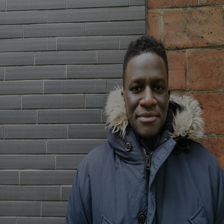

In [54]:
from IPython.display import Image as sfsd
sfsd("/content/drive/MyDrive/Culling/Manipulated/overall_exposed/overall_exposed0.png")